# Análise Exploratória de Dados - Diamantes
**Projeto de Extensão:** Introdução à Ciência de Dados (ICD 2026)

**Autores:**
   - Gustavo Kim Alcantara (RA: 820763)
   - Enzo Dezem Alves (RA:801743)

---
## 1.1 Introdução e Definição do Dataset
Este projeto visa realizar uma análise exploratória sobre o dataset "Diamonds", contendo atributos de preço e qualidade de quase 54.000 diamantes.
**Link da base:** https://www.kaggle.com/datasets/zahranusrat/diamonds-characteristics-and-pricing-analysis





**Perguntas a serem respondidas**
   - 1 O tamanho do diamante tem relação com preço?
   - 2 Existem outliers que precisam ser removidos para não atrapalharem em uma futura modelagem?
   - 3 As variáveis numéricas apresentam simetria ou assimetria? Há caudas longas?
   - 4 depth e table influenciam o preço ou apenas o tamanho importa?

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Carregamento dos dados
try:
    df = pd.read_csv('data/diamonds.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo 'diamonds.csv' não encontrado na pasta 'data'.")

# Exibição das primeiras linhas e informações gerais
display(df.head())
print("\n--- Informações dos Atributos ---")
df.info()

Dataset carregado com sucesso!


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335



--- Informações dos Atributos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [2]:
# Estatísticas descritivas iniciais
display(df.describe())

# Verificação de duplicatas
duplicatas = df.duplicated().sum()
print(f"\nQuantidade de linhas duplicadas: {duplicatas}")

# Verificação de valores nulos
nulos = df.isnull().sum()
print(f"\nQuantidade de valores nulos por coluna:\n{nulos}")

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000



Quantidade de linhas duplicadas: 146

Quantidade de valores nulos por coluna:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


## 1.3 Análise Multivariada

Uma vez feitos os gráficos das analises uni variadas, vamos partir para análise multivariada , para tentar capturar relações entre variáveis.

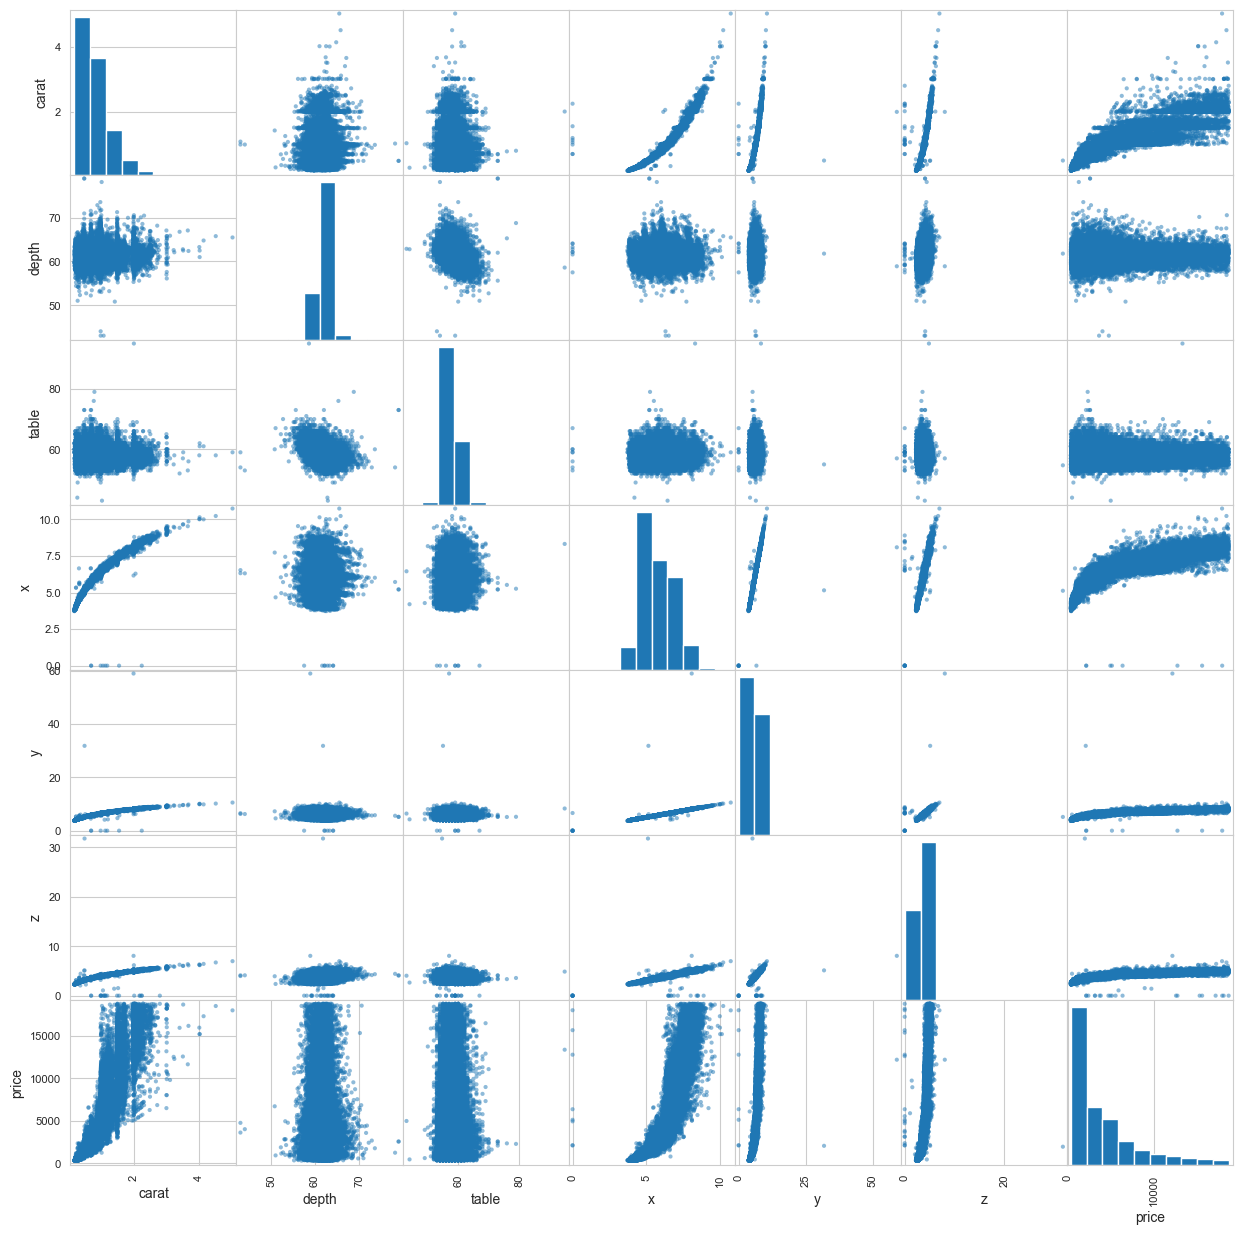

In [9]:
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()

Como é possivel observar, existe algumas relações aparentemente lineares,  outras relações parecendo com a curva exponencial e outras que parecem não ter uma realação clara linear, para isso vamos partir para uma análise individual das fetueres com a variavel alvo **Price**.

Começando pelas **categóricas** que ainda não foram analisadas.

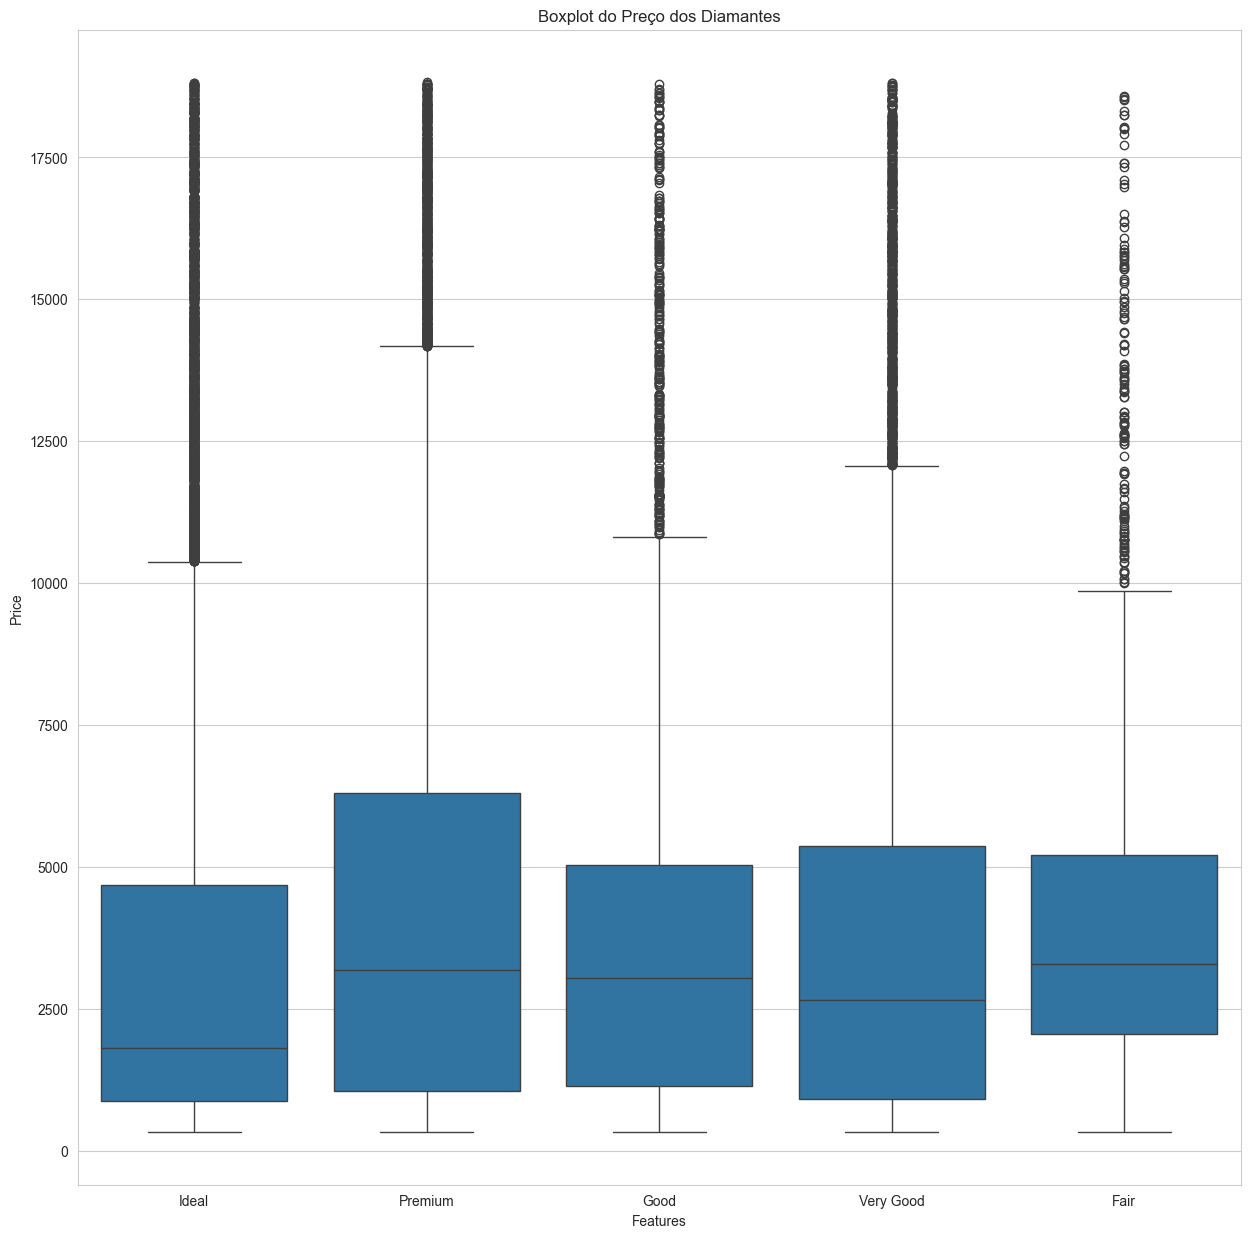

In [10]:
df_plot = df.copy()


plt.figure(figsize=(15,15))
sns.boxplot(data=df_plot, x="cut", y="price")
plt.title('Boxplot do Preço dos Diamantes')
plt.xlabel("Features")
plt.ylabel("Price")
plt.show()

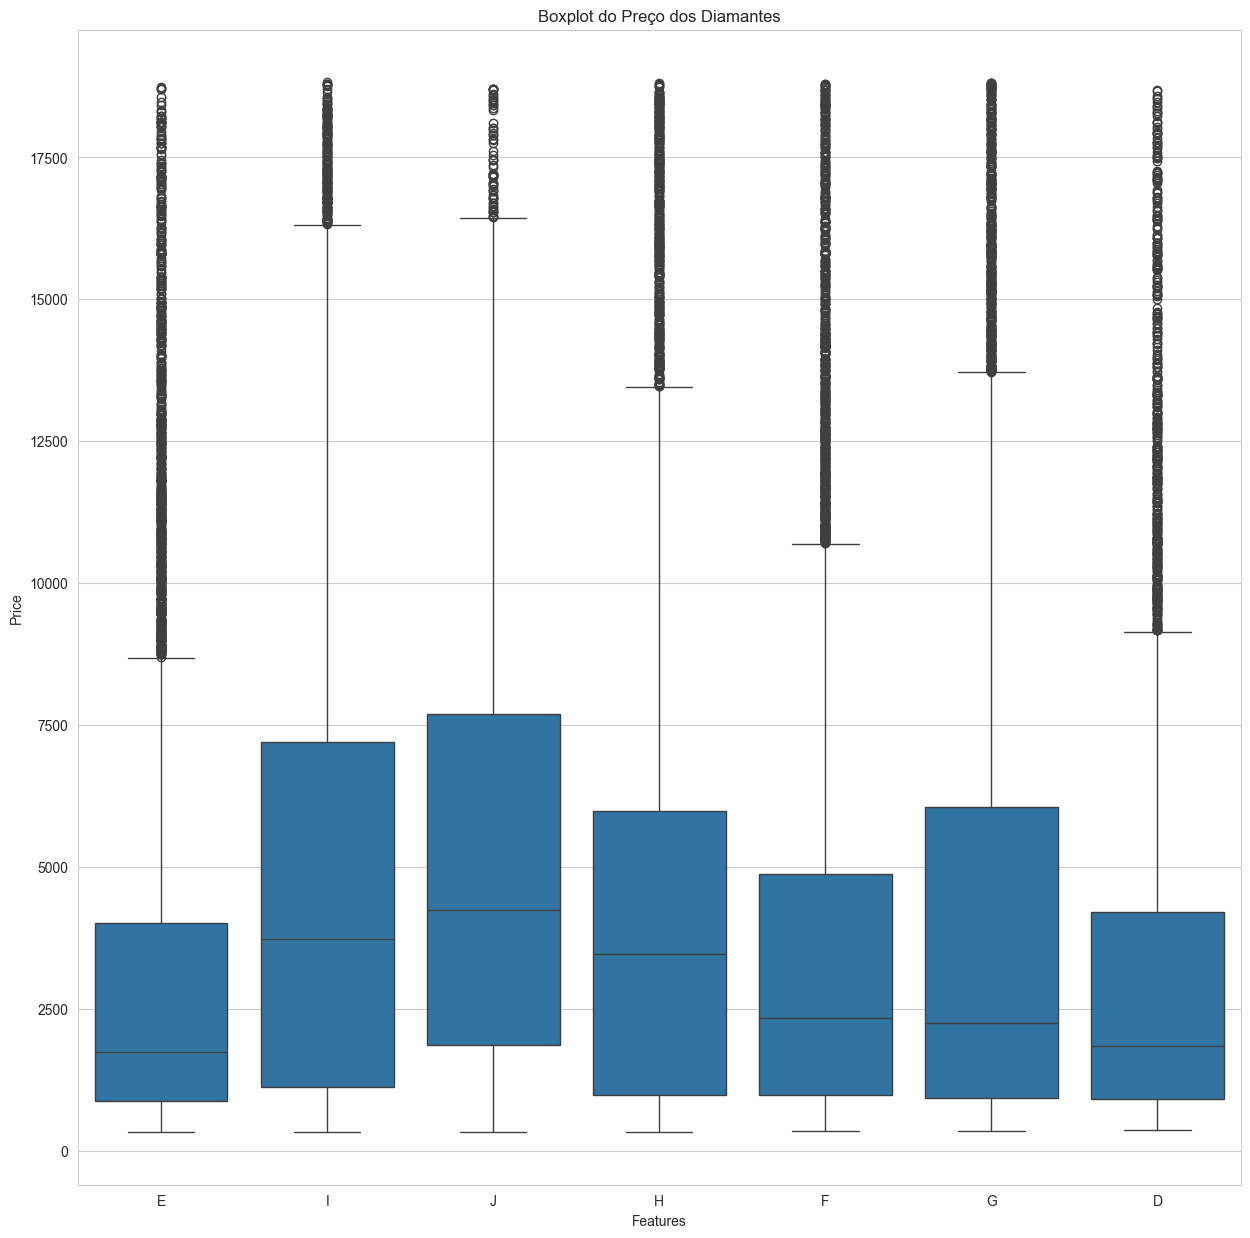

In [11]:
df_plot = df.copy()


plt.figure(figsize=(15,15))
sns.boxplot(data=df_plot, x="color", y="price")
plt.title('Boxplot do Preço dos Diamantes')
plt.xlabel("Features")
plt.ylabel("Price")
plt.show()

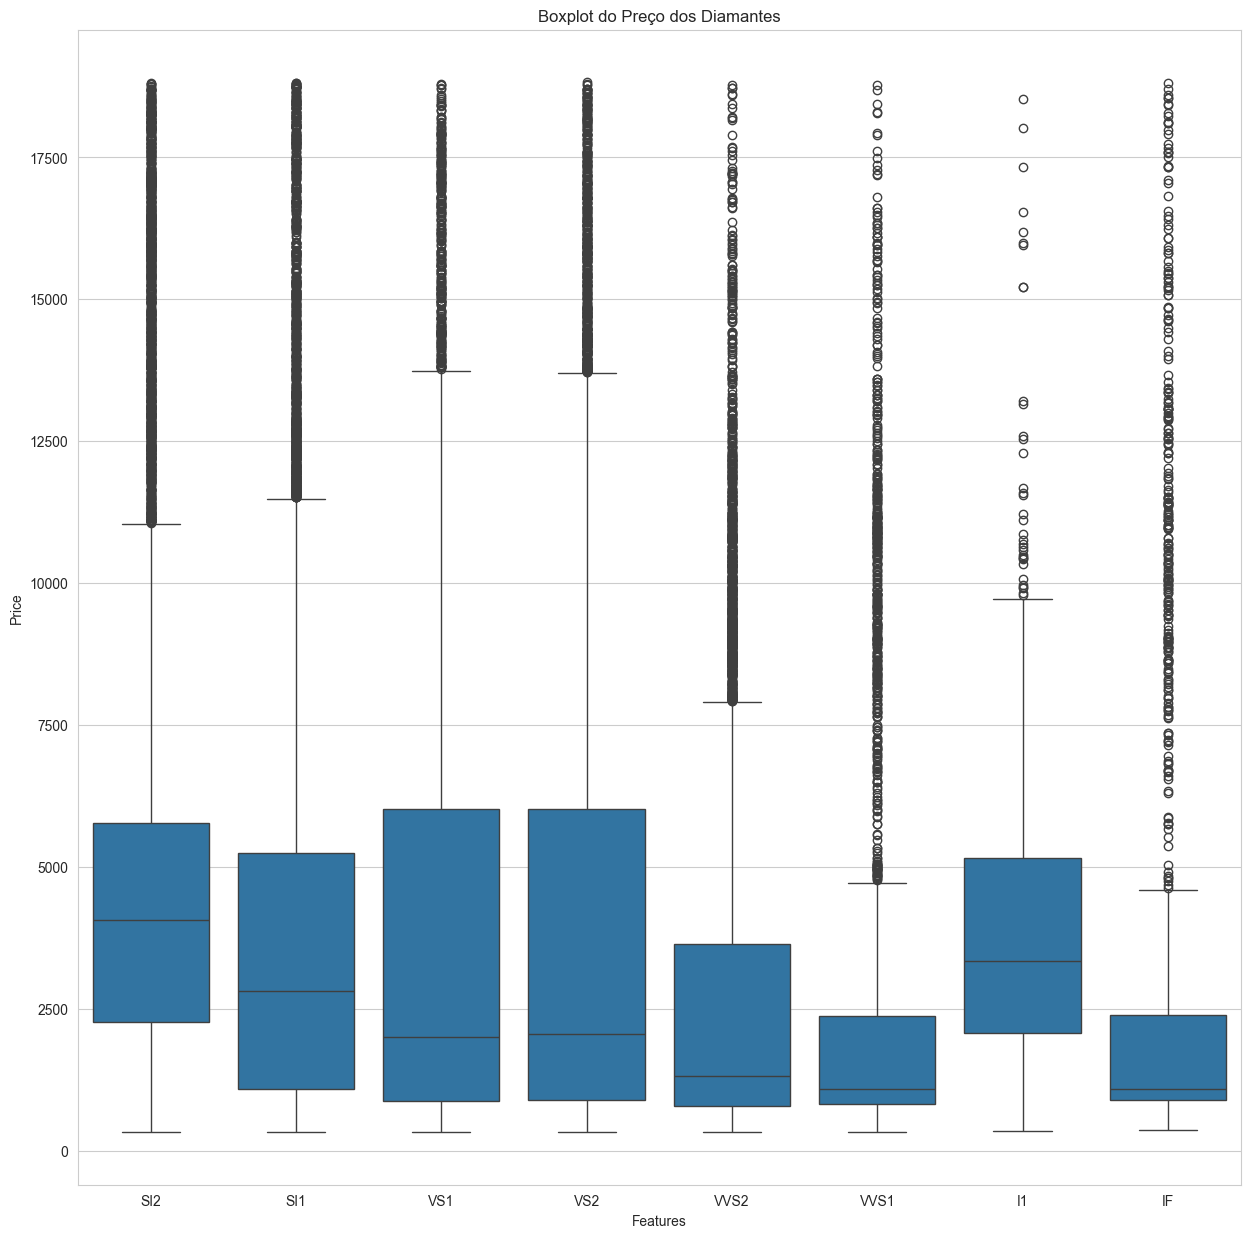

In [12]:
df_plot = df.copy()


plt.figure(figsize=(15,15))
sns.boxplot(data=df_plot, x="clarity", y="price")
plt.title('Boxplot do Preço dos Diamantes')
plt.xlabel("Features")
plt.ylabel("Price")
plt.show()

Como é possivel observar, existem muitos **outliers** nas distribuições, e isso pode ser ruim para caso fossemos treinar um modelo, pois pode atrapalhar a previsão.
Iremos analisar mais tarde o motivo desses outliers e se faz sentido manter eles no dataset.
Porem creio que o motivo desses outliers seja de que essa variavel sozinha não explica muito o preço do diamante, mas percebemos que elas tem medianas diferentes de valores, o que pode levar nós a ordena-las em variaveis numéricas.

In [ ]:
### depth e table.

Agora partindo para uma análise das variáveis especificas numéricas

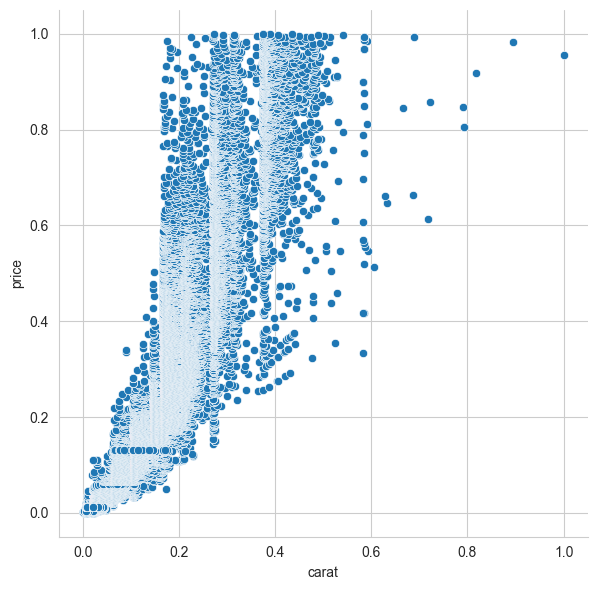

In [19]:
##Analise da relação entre atributos numéricos com a variavel alvo (price)
df_plot_num = df.select_dtypes(include=[np.number])

#normalização da variável alvo para melhor visualização
df_plot_num["price"] = (df_plot_num["price"] - df_plot_num["price"].min()) / (df_plot_num["price"].max() - df_plot_num["price"].min())

df_plot_num["carat"] = (df_plot_num["carat"] - df_plot_num["carat"].min()) / (df_plot_num["carat"].max() - df_plot_num["carat"].min())
sns.FacetGrid(df_plot_num, height=6).map(sns.scatterplot, "carat", "price").add_legend()

plt.show()

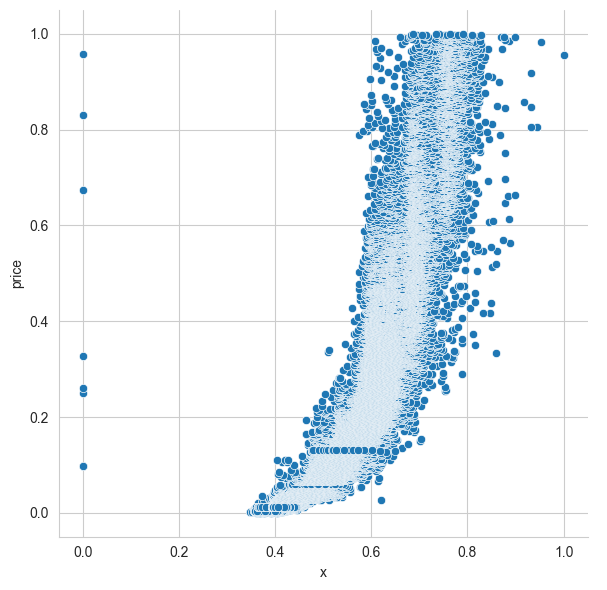

In [20]:


df_plot_num["x"] = (df_plot_num["x"] - df_plot_num["x"].min()) / (df_plot_num["x"].max() - df_plot_num["x"].min())
sns.FacetGrid(df_plot_num, height=6).map(sns.scatterplot, "x", "price").add_legend()

plt.show()

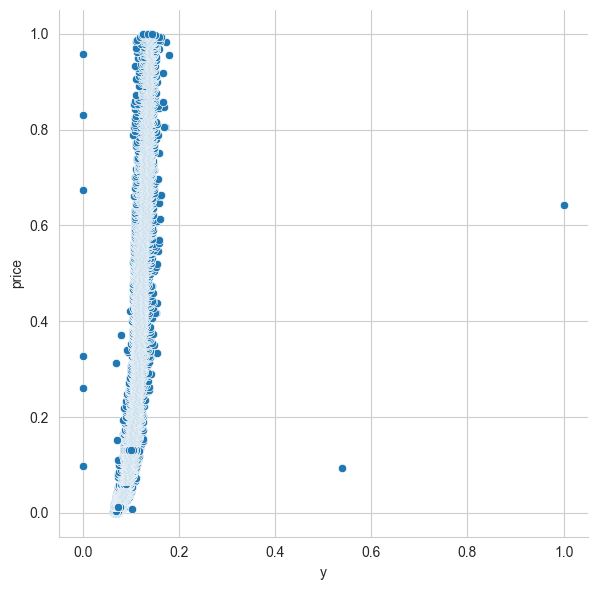

In [21]:
df_plot_num["y"] = (df_plot_num["y"] - df_plot_num["y"].min()) / (df_plot_num["y"].max() - df_plot_num["y"].min())
sns.FacetGrid(df_plot_num, height=6).map(sns.scatterplot, "y", "price").add_legend()

plt.show()

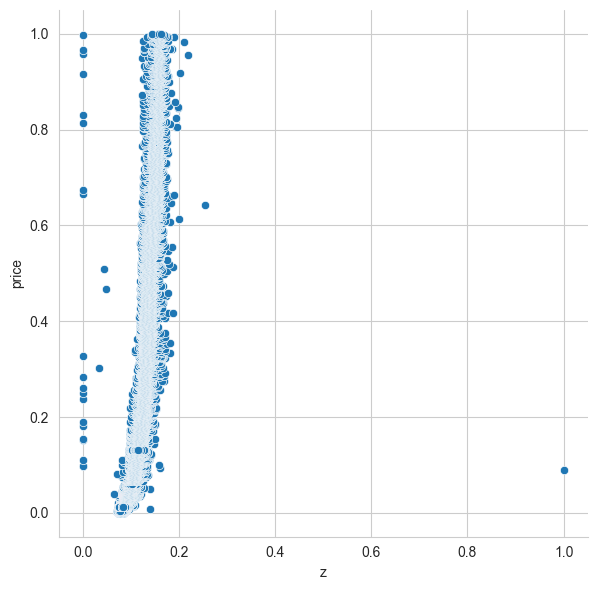

In [28]:
df_plot_num["z"] = (df_plot_num["z"] - df_plot_num["z"].min()) / (df_plot_num["z"].max() - df_plot_num["z"].min())
sns.FacetGrid(df_plot_num, height=6).map(sns.scatterplot, "z", "price").add_legend()

plt.show()

<Axes: xlabel='carat', ylabel='price'>

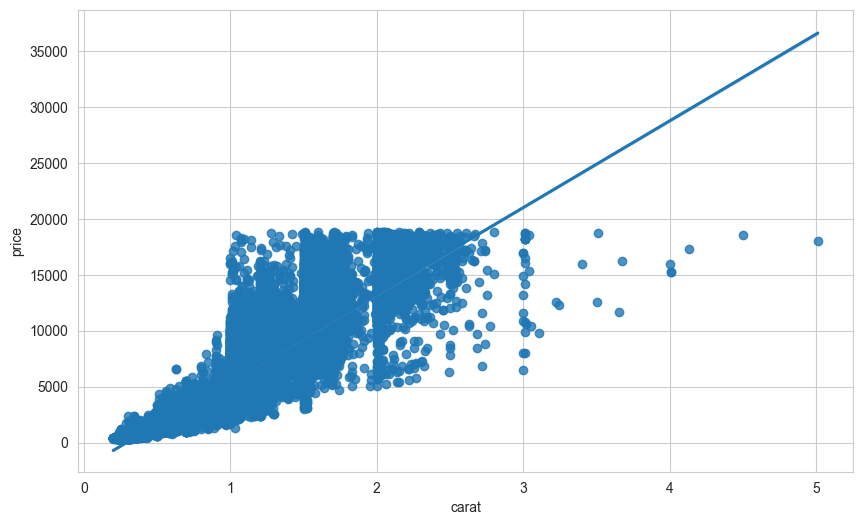

In [29]:
sns.regplot(data=df, x='carat', y='price')


Aparentemente essas relações com o tamanho do diamente são todas exponenciais, porem elas indicam uma alta correlação do aumento do tamanho do diamente ao aumento de preço do mesmo. 

Vamos analisar agora a correlação das várivaies numéricas do dataset

<Figure size 1200x1000 with 0 Axes>

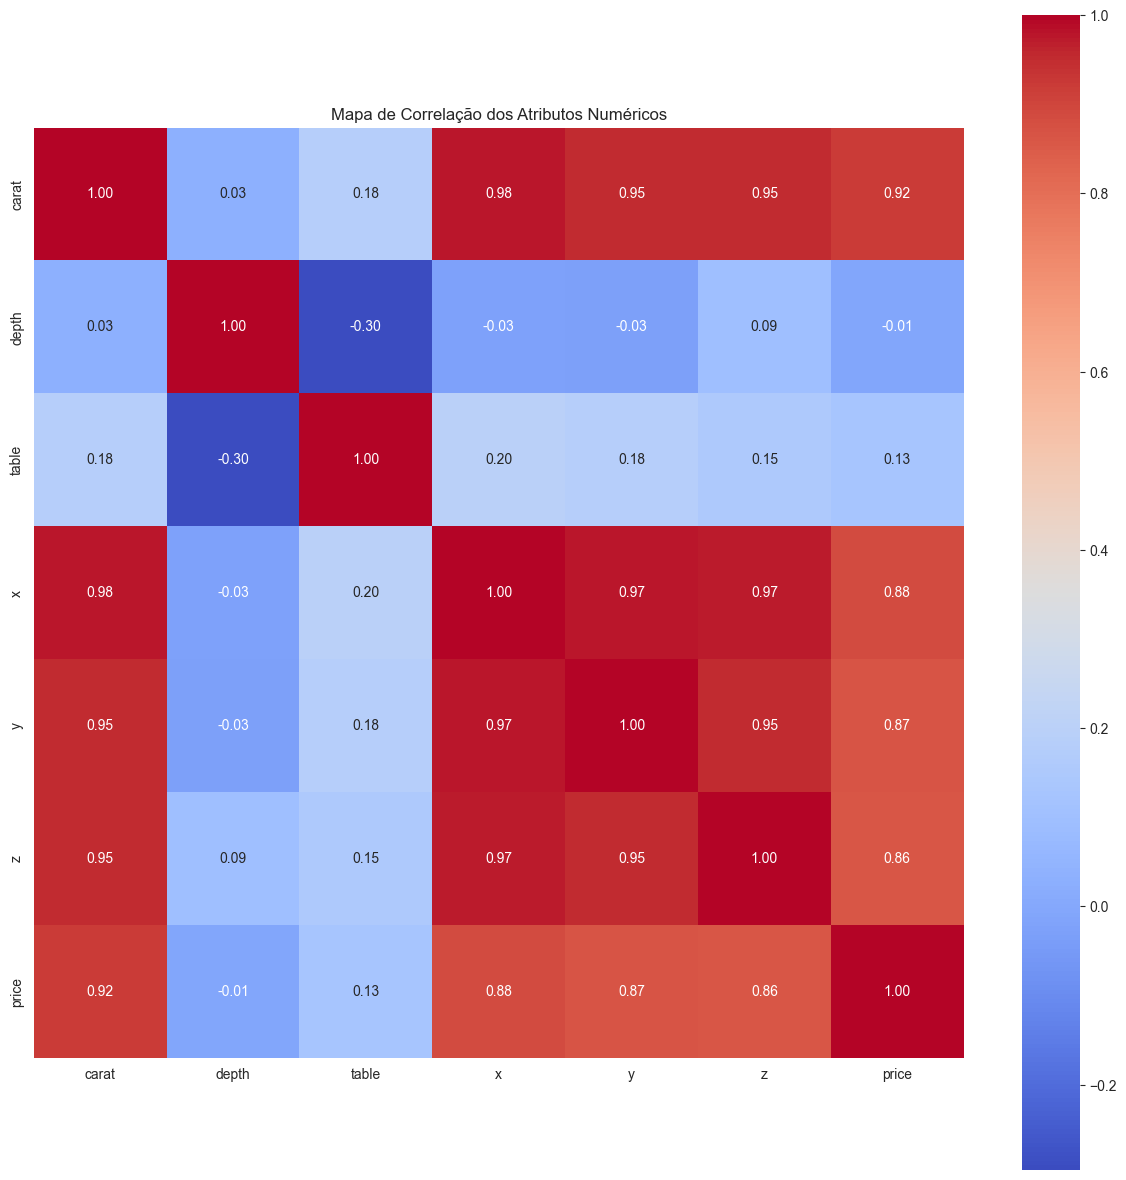

In [15]:
df_plot_num = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
corr = df_plot_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa de Correlação dos Atributos Numéricos')
plt.show()

Como pode ser observado, temos variáveis extremamente correlacionadas com a variavel alvo **price**, tendo 4 variaveis com uma correlação **linear** de mais de 85% com a a mesma. E isso é explicavel , pois como pode se imaginar, quanto maior o diamente, maior o seu valor. **O que responde a nossa primeira pergunta**.

Porem é possivel observar, que essas variaveis , por indicarem o tamanho do diamente, estão muito correlacionadas entre si, o que pode em alguns modelos atrapalhar a previsão.

## 1.4 Análise de outliers



Agora vamos para a análise de ***outliers***, alguns outliers podem fazer sentido, como um diamante extremamente raro por N razôes, porem as vezes temos dados com valores digitados erroneamente, e é trabalho do cientista de dados achar esses dados e diferenciar os casos, vamos começar retirando dados que claramente foram digitados erroneamente.

Caso o diamante tenha dimensões x,y,z = 0, claramente houve um erro de digitação e esse dado precisa ser retirado.

<Axes: xlabel='z', ylabel='price'>

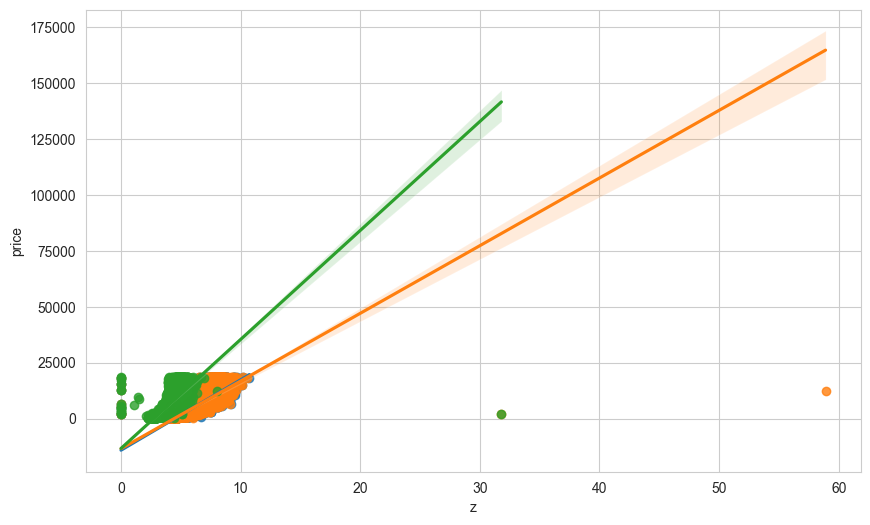

In [30]:
sns.regplot(data=df, x='x', y='price')
sns.regplot(data=df, x='y', y='price')
sns.regplot(data=df, x='z', y='price')


como é possivel ver, temos variaveis com x,y ou z = 0 e isso precisa ser tratado.

<Axes: xlabel='z', ylabel='price'>

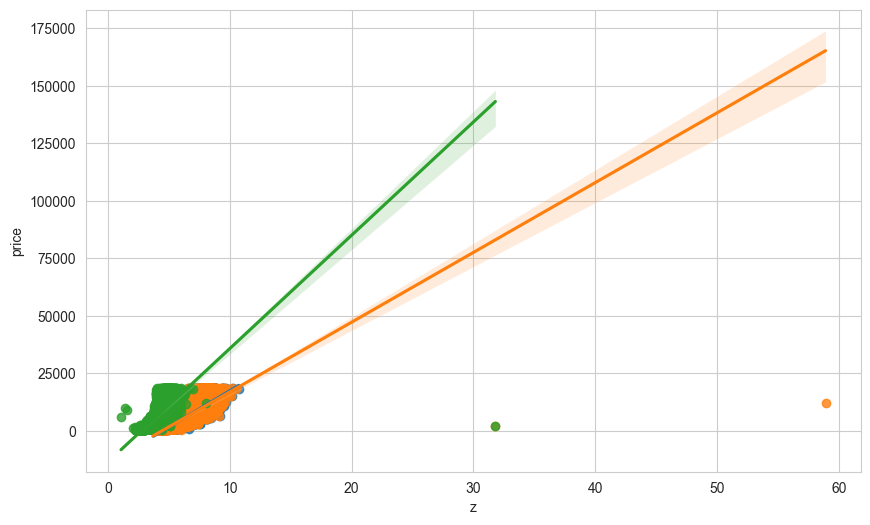

In [32]:
#removendo outliers com erro de digitação/medição

df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

sns.regplot(data=df, x='x', y='price')
sns.regplot(data=df, x='y', y='price')
sns.regplot(data=df, x='z', y='price')

Como pode ser visto, os outliers por erro de digitação foram removidos, agora vamos limpar o dataset por outro aspecto. **E essa remoção responde a nossa segunda pergunta**.